<a href="https://colab.research.google.com/github/achyutasainikhil/Projects/blob/main/Stroke_Prediction_Dataset_Data_Quality_%26_Exploratory_Data_Analysis_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Stroke Prediction Dataset Data Quality & Exploratory Data Analysis (EDA)**

In [4]:
import pandas as pd

# Load dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

# Display first few rows
print(df.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


**Data Quality Assessment**

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [6]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates if found
df = df.drop_duplicates()

Number of duplicate rows: 0


In [7]:
# Display data types
print("Data Types:\n", df.dtypes)

Data Types:
 id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


**Data Cleaning & Preprocessing**

In [8]:
# Filling missing values in 'bmi' with the median
df['bmi'].fillna(df['bmi'].median(), inplace=True)

<ipython-input-8-68f8d30d7a6f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


In [9]:
# Convert categorical values to lowercase
df['gender'] = df['gender'].str.lower()
df['smoking_status'] = df['smoking_status'].str.lower()
df['work_type'] = df['work_type'].str.lower()
df['Residence_type'] = df['Residence_type'].str.lower()

**Visualizing**

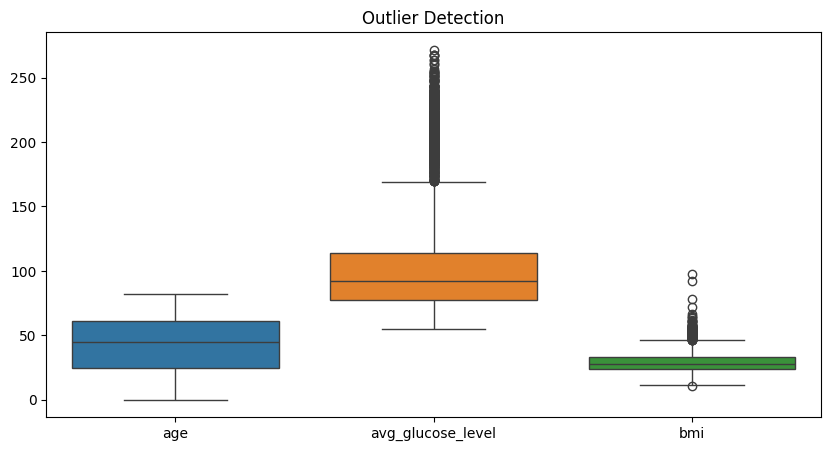

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to detect outliers in numerical features
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['age', 'avg_glucose_level', 'bmi']])
plt.title("Outlier Detection")
plt.show()

**Exploratory Data Analysis (EDA)**

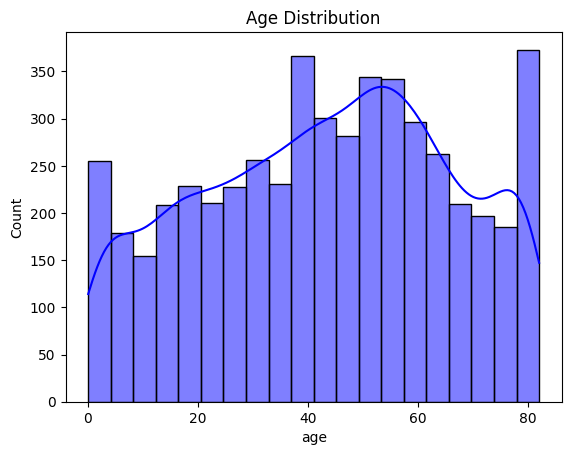

In [11]:
# Distribution of Age
sns.histplot(df['age'], bins=20, kde=True, color='blue')
plt.title("Age Distribution")
plt.show()

<ipython-input-12-1153ff99c444>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=df, palette="coolwarm")


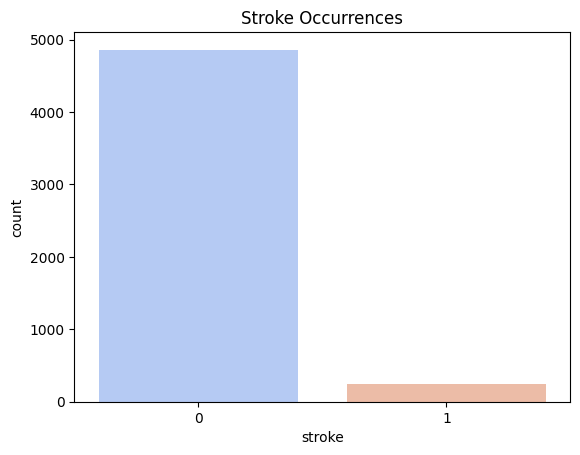

In [12]:
# Stroke vs Non-Stroke Analysis
# Count plot of stroke occurrences
sns.countplot(x='stroke', data=df, palette="coolwarm")
plt.title("Stroke Occurrences")
plt.show()

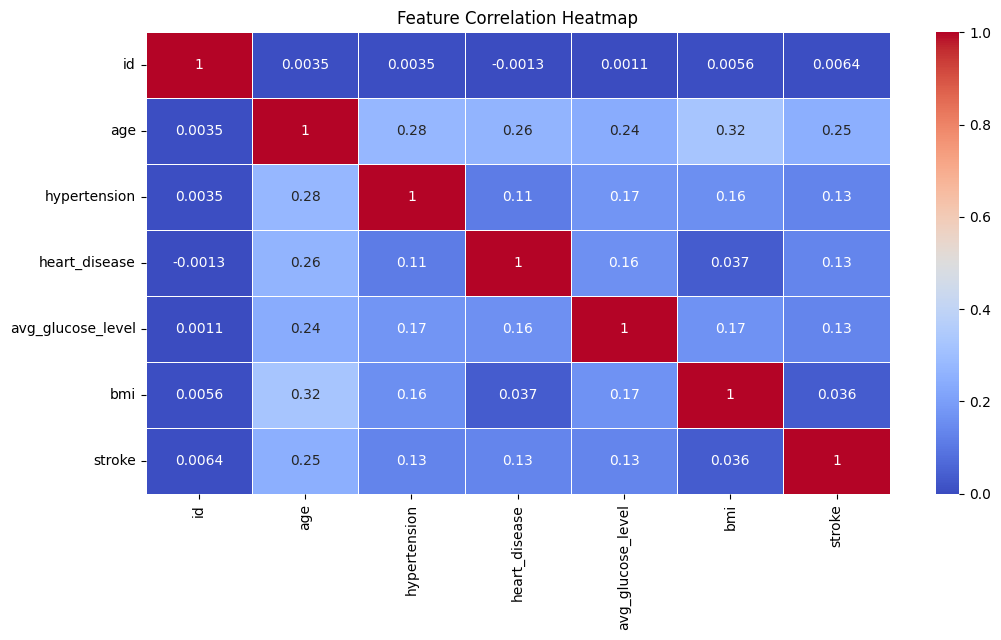

In [18]:
# Compute correlation matrix
# Select only numerical features for correlation calculation
numerical_features = df.select_dtypes(include=['number'])
corr_matrix = numerical_features.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

<ipython-input-19-d4625c036db3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y='age', data=df, palette="coolwarm")


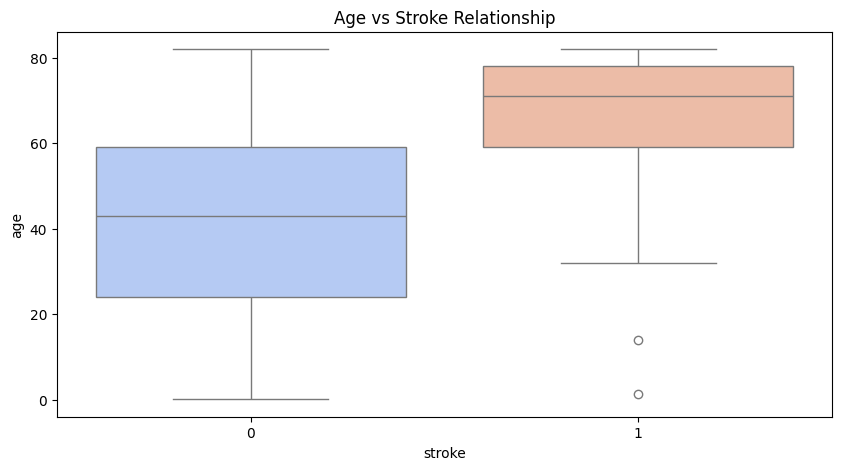

In [19]:
# Relationship Between Age & Stroke
plt.figure(figsize=(10, 5))
sns.boxplot(x='stroke', y='age', data=df, palette="coolwarm")
plt.title("Age vs Stroke Relationship")
plt.show()

<ipython-input-20-991b0e8d3524>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['stroke'] == 1]['avg_glucose_level'], shade=True, color="red", label="Stroke")
<ipython-input-20-991b0e8d3524>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['stroke'] == 0]['avg_glucose_level'], shade=True, color="blue", label="No Stroke")


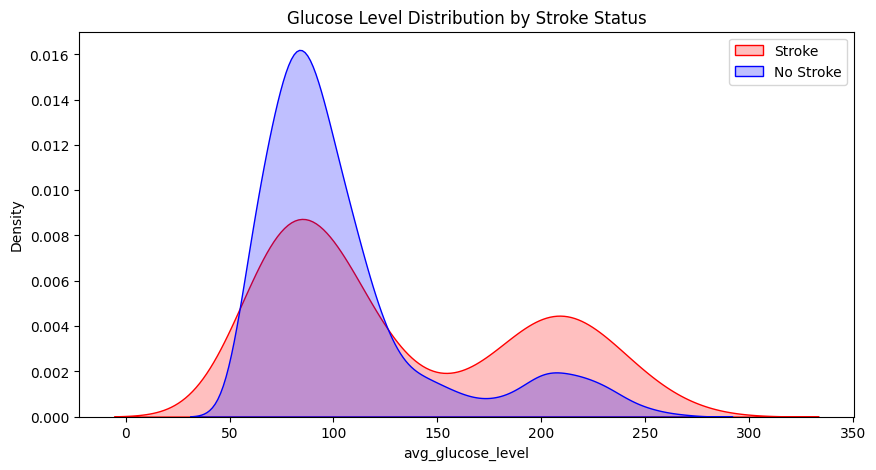

In [20]:
# Glucose Level vs Stroke Analysis
plt.figure(figsize=(10, 5))
sns.kdeplot(df[df['stroke'] == 1]['avg_glucose_level'], shade=True, color="red", label="Stroke")
sns.kdeplot(df[df['stroke'] == 0]['avg_glucose_level'], shade=True, color="blue", label="No Stroke")
plt.title("Glucose Level Distribution by Stroke Status")
plt.legend()
plt.show()